In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

In [2]:
# delta = w_c - w_q;       w_c = cavity freq., w_q = qubit freq. = 6GHz
# lambda = coupling rate

# Transition: |g, g, 1> --> |e, e, 0>; this happens at w_c ~= 2w_q

# H = H_q + H_c + lambda * X * sum(cos(theta) * sigmax_i + sin(theta) * sigmaz_i)
# H_q = (w_q/2 * sum(sigmaz_i))
# H_c = w_c * adag * a
# X = a + adag

In [3]:
w_q = 6e9;
lambda_ = 0.1 * w_q
theta = np.pi/6
N = 5   # Vector space of photon

w_cq = np.linspace(0.8, 2.2, 5000)
w_c = w_cq * w_q

# Photon
a = tensor(identity(2), identity(2), destroy(N))
adag = a.dag()
X = a + adag

# Atom 1
sx1 = tensor(sigmax(), identity(2), identity(N))
sz1 = tensor(sigmaz(), identity(2), identity(N))

# Atom 2
sx2 = tensor(identity(2), sigmax(), identity(N))
sz2 = tensor(identity(2), sigmaz(), identity(N))

H_q = (w_q/2) * (sz1 + sz2)   # Qubit Hamitonian
idx = 0
evals_mat = np.zeros((len(w_cq),2*2*N))

for wc in w_c:
    H_c = wc * adag * a       # Cavity Hamiltonian
    V = lambda_ * X * (np.cos(theta) * (sx1 + sx2) + np.sin(theta) * (sz1 + sz2))
    H_0 = H_q + H_c + V
    evals, ekets = H_0.eigenstates()
    evals_mat[idx, :] = evals
    idx += 1

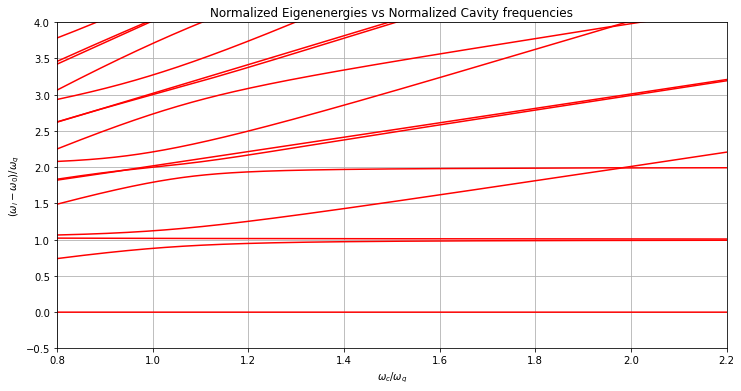

In [4]:
fig, ax = plt.subplots(figsize=(12,6))

for n in range(2*2*N):
    
    # A plot of normalized eigenenergy differences vs the normalized cavity frequencies
    
    ax.plot(w_cq, (evals_mat[:,n] - evals_mat[:,0])/w_q, 'r')
    
ax.set_xlim(0.8,2.2)
ax.set_ylim(-0.5,4)
ax.set_xlabel('$\omega_c/\omega_q$')
ax.set_ylabel('$(\omega_i - \omega_0)/\omega_q$')
ax.set_title('Normalized Eigenenergies vs Normalized Cavity frequencies')
ax.grid()

In [5]:
np.argmin(evals_mat[:,4] - evals_mat[:,3])

4213